In [8]:
import pytrends
from pytrends.request import TrendReq
import pandas as pd

import matplotlib.pyplot as plt

In [41]:
# query trend information for the following keywords
keyword_list = ['Sea Level','Temperatures','Carbon Dioxide','Global Warming']#, 'Weather']
country_list = ['AR', 'US', 'GB', 'DE', 'AU']

# build the connection
pytrend = TrendReq(hl='en-US', tz=360)

# Initialize an empty DataFrame to store the results
results_df = None

# get the trend information
for country in country_list:

    pytrend.build_payload(kw_list=keyword_list, timeframe = 'today 5-y', geo=country)
    temp_df = pytrend.interest_over_time()
    temp_df.drop(labels=['isPartial'],axis='columns', inplace=True)
    temp_df['country'] = country

    if results_df is None:
        results_df = temp_df
    else:
        results_df = pd.concat([results_df,temp_df], axis=0)

    print(results_df.head())

            Sea Level  Temperatures  Carbon Dioxide  Global Warming country
date                                                                       
2018-10-28          0            25              48              23      AR
2018-11-04          0             0              49               0      AR
2018-11-11         41            41              23              48      AR
2018-11-18          0             0               0              32      AR
2018-11-25          0             0              27              53      AR
            Sea Level  Temperatures  Carbon Dioxide  Global Warming country
date                                                                       
2018-10-28          0            25              48              23      AR
2018-11-04          0             0              49               0      AR
2018-11-11         41            41              23              48      AR
2018-11-18          0             0               0              32      AR
2018-11-25  

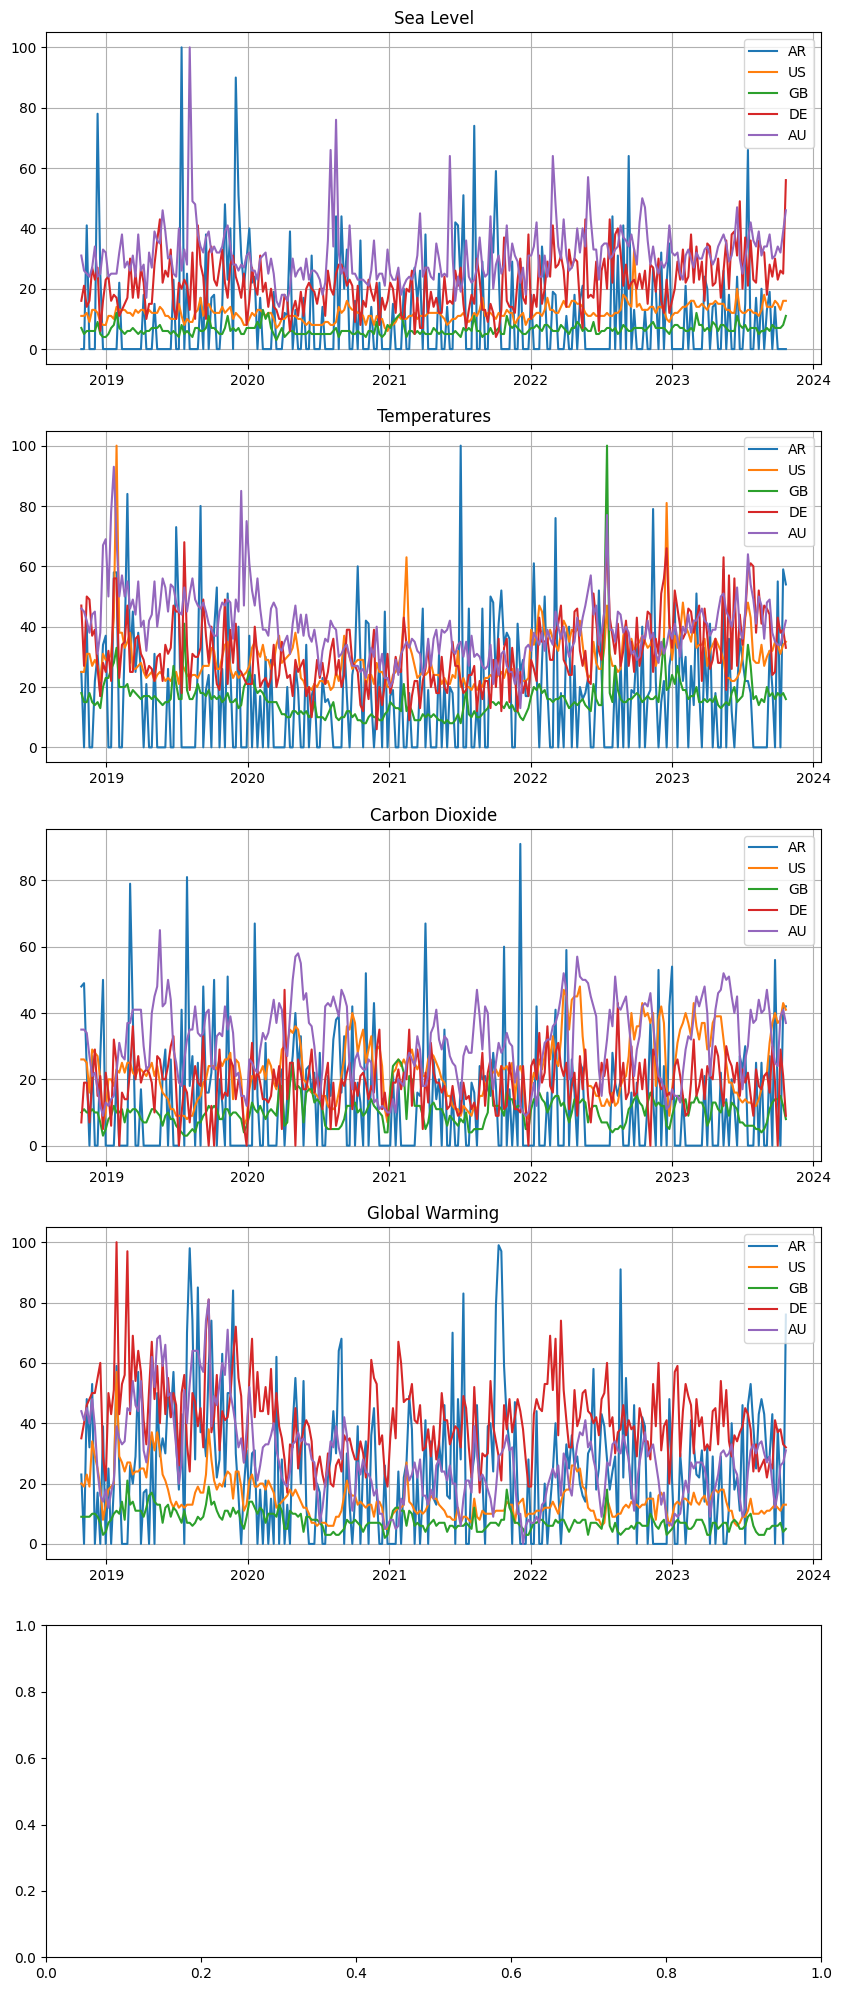

In [42]:
# plot each keyword trend information differentiating by country
fig, axs = plt.subplots(5, 1, figsize=(10, 25))

for i, keyword in enumerate(keyword_list):
    for country in results_df['country'].unique():
        country_data = results_df[results_df['country'] == country].reset_index()
        axs[i].plot(country_data['date'], country_data[keyword], label=country)
    axs[i].set_title(keyword)
    
    axs[i].legend()
    axs[i].grid(True)

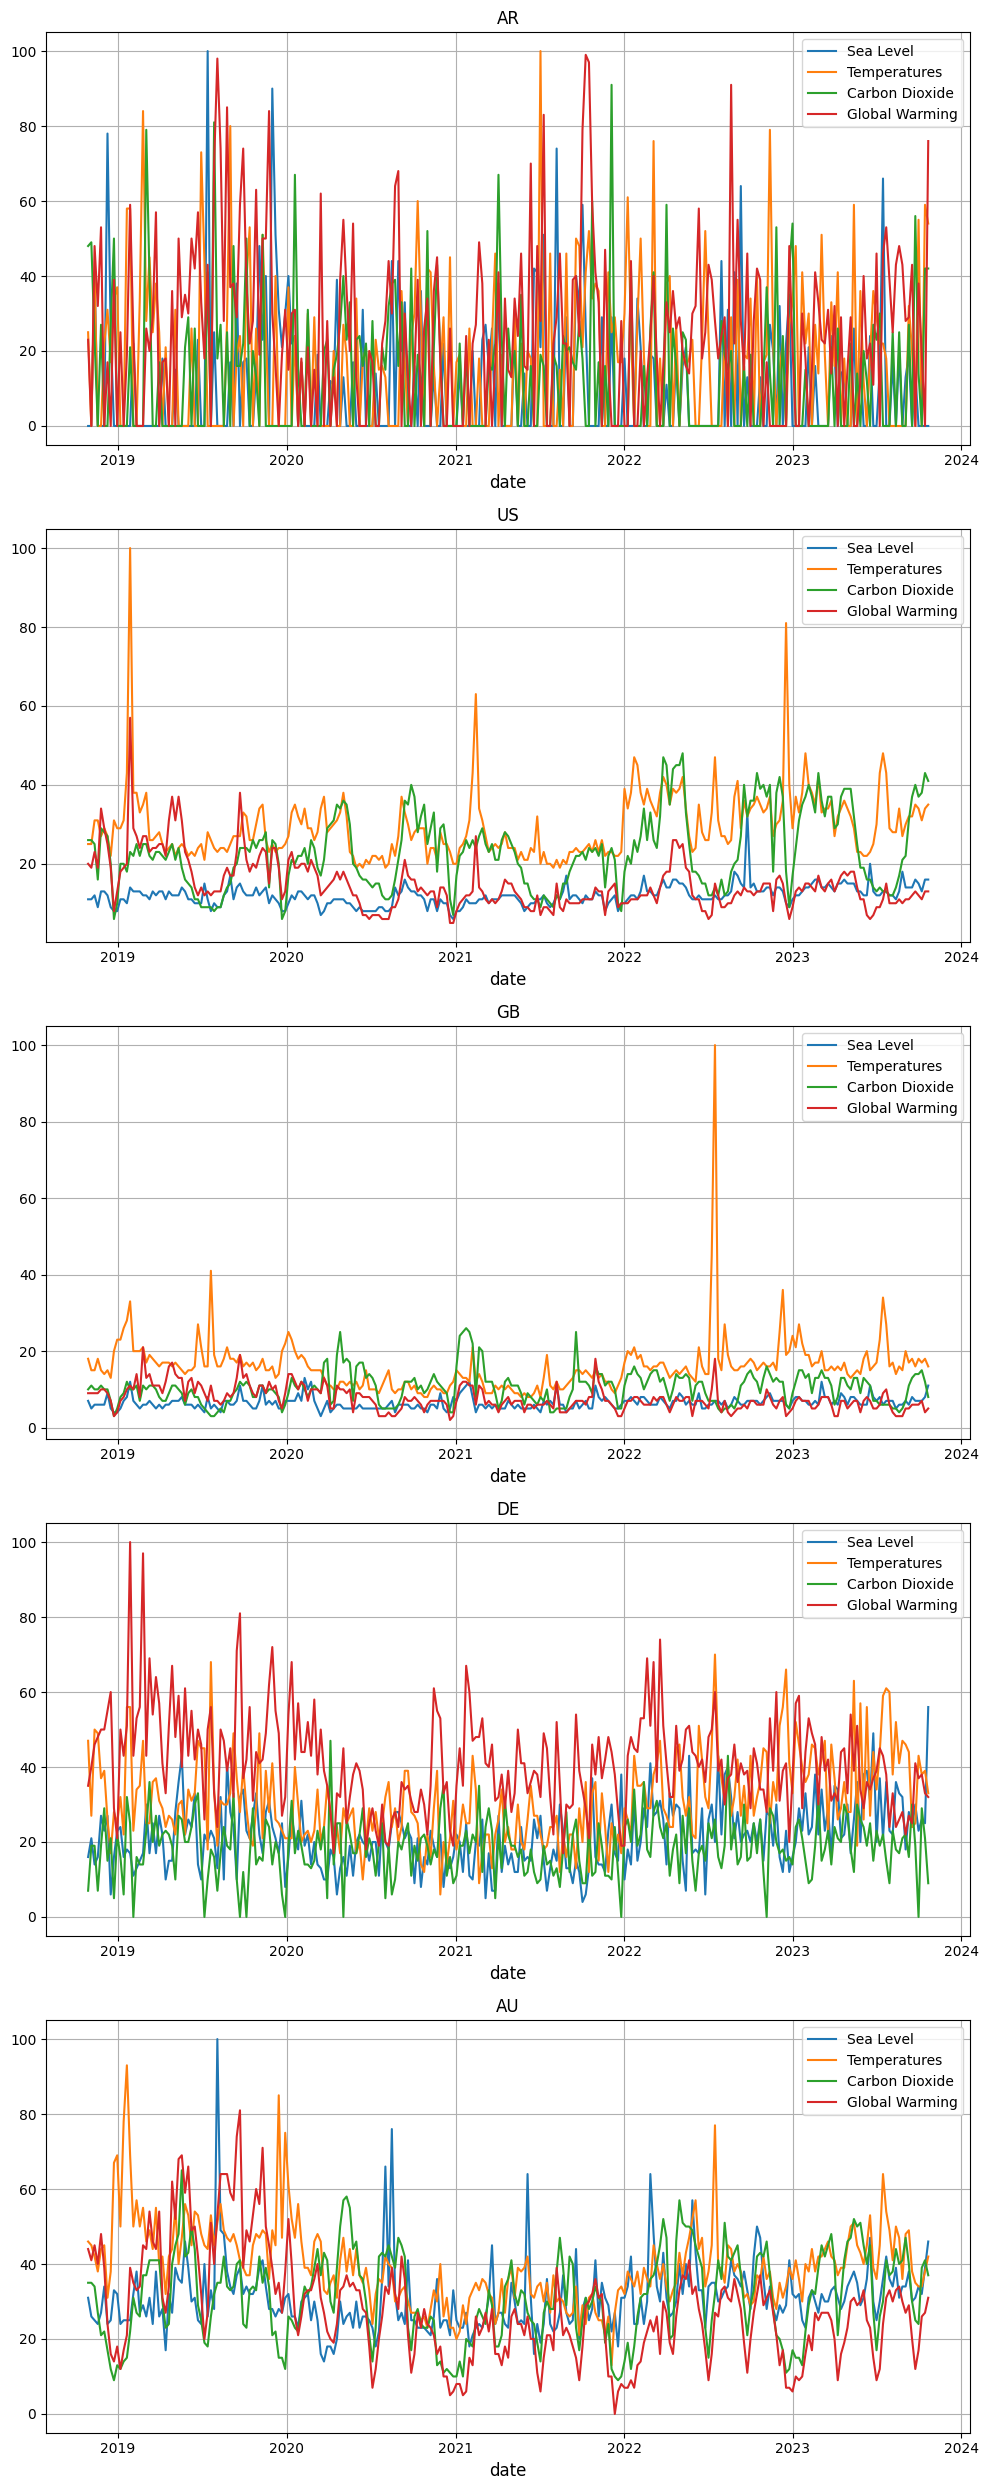

In [43]:
# plot each country trend information differentiating by keyword
fig, axs = plt.subplots(5, 1, figsize=(10, 25))

for i, country in enumerate(results_df['country'].unique()):
    for keyword in keyword_list:
        country_data = results_df[results_df['country'] == country].reset_index()
        axs[i].plot(country_data['date'], country_data[keyword], label=keyword)
    axs[i].set_title(country)
    axs[i].set_xlabel('date', fontsize=12)
    # axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()